In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data/GOOGL.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


x= np.random.normal(150,8,200)
plt.hist(x)
plt.show()

In [ ]:
data=data.drop(['Date','Adj Close'],axis=1)
data.head()

,Open,High,Low,Close,Volume
0,50.050049,52.082081,48.028027,50.220219,44659096
1,50.555557,54.594597,50.300301,54.209209,22834343
2,55.430431,56.796799,54.579578,54.754753,18256126
3,55.675674,55.855858,51.836838,52.487488,15247337
4,52.532532,54.054054,51.991993,53.053055,9188602


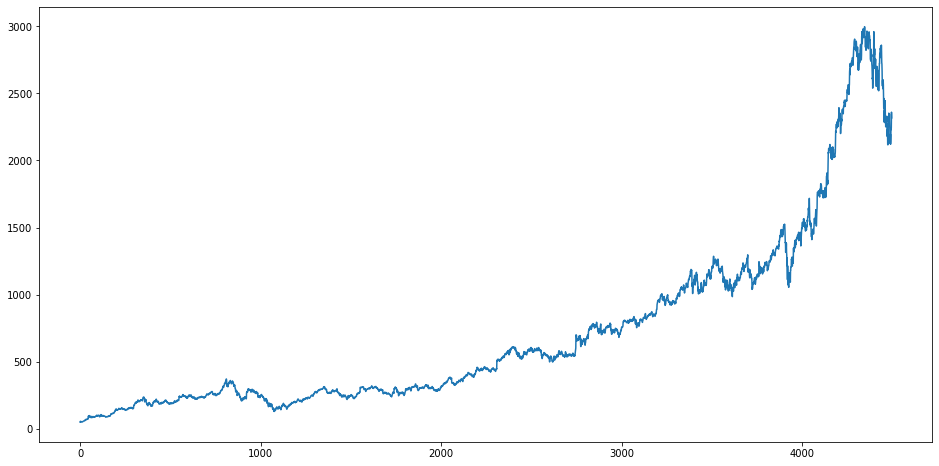

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data.Close)

In [ ]:
data

,Open,High,Low,Close,Volume
0,50.050049,52.082081,48.028027,50.220219,44659096
1,50.555557,54.594597,50.300301,54.209209,22834343
2,55.430431,56.796799,54.579578,54.754753,18256126
3,55.675674,55.855858,51.836838,52.487488,15247337
4,52.532532,54.054054,51.991993,53.053055,9188602
...,...,...,...,...,...
4490,2178.590088,2249.790039,2172.000000,2230.879883,2370800
4491,2211.129883,2266.929932,2207.649902,2229.750000,1538700
4492,2244.629883,2254.850098,2210.010010,2244.840088,1418100
4493,2259.899902,2361.580078,2259.050049,2359.500000,2054600


In [ ]:
ma100=data.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4490    2521.801797
4491    2518.298296
4492    2514.076497
4493    2510.610796
4494    2506.248696
Name: Close, Length: 4495, dtype: float64

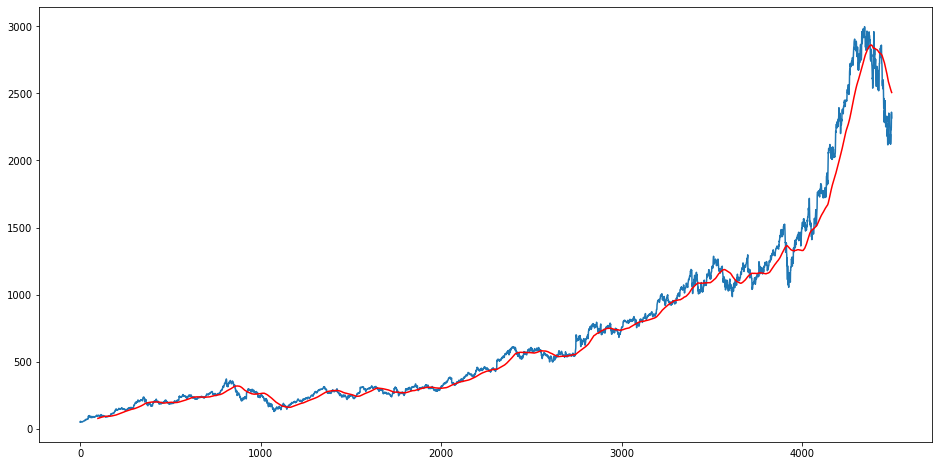

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=data.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4490    2682.441700
4491    2679.216500
4492    2676.012650
4493    2673.441050
4494    2670.670299
Name: Close, Length: 4495, dtype: float64

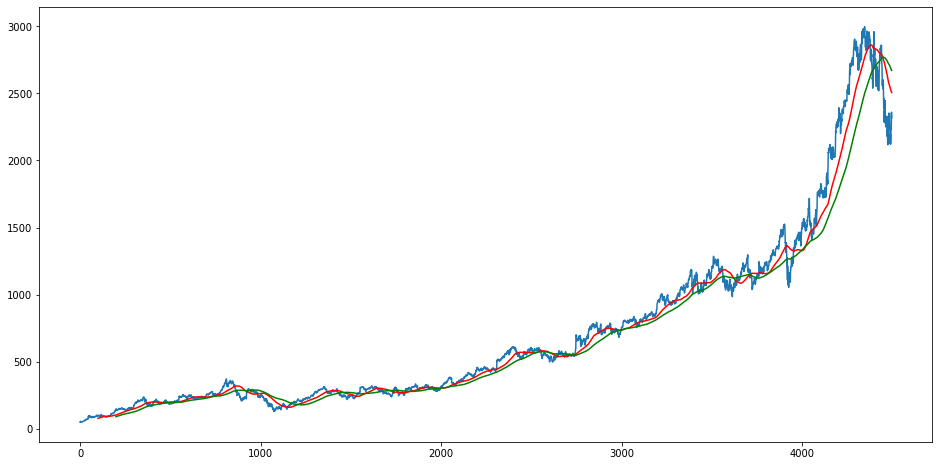

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
data.shape

(4495, 5)

#splitting data into training and testing



In [ ]:
data_training=pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing=pd.DataFrame(data['Close'][int(len(data)*0.70):int(len(data))])
print(data_training.shape)
print(data_testing.shape)

(3146, 1)
(1349, 1)


In [ ]:
data_training.head()

,Close
0,50.220219
1,54.209209
2,54.754753
3,52.487488
4,53.053055


In [ ]:
data_testing.head()

,Close
3146,842.169983
3147,846.549988
3148,849.270020
3149,851.359985
3150,851.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[2.04312259e-04],
       [5.13876906e-03],
       [5.81361741e-03],
       ...,
       [9.75890510e-01],
       [9.77214129e-01],
       [9.73861780e-01]])

In [ ]:
data_training_array.shape

(3146, 1)

In [ ]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(3046, 100, 1)

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model=Sequential()
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model=Sequential()
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model=Sequential()
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 120)               58560     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 58,681
Trainable params: 58,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs =5)

Epoch 1/5
96/96 [==============================] - 10s 86ms/step - loss: 0.0272
Epoch 2/5
96/96 [==============================] - 9s 89ms/step - loss: 0.0062
Epoch 3/5
96/96 [==============================] - 8s 88ms/step - loss: 0.0053
Epoch 4/5
96/96 [==============================] - 8s 85ms/step - loss: 0.0044
Epoch 5/5
96/96 [==============================] - 8s 84ms/step - loss: 0.0040


In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
3146,842.169983
3147,846.549988
3148,849.270020
3149,851.359985
3150,851.000000


In [ ]:
past_100_days=data_training.tail(100)


In [ ]:
final_data=past_100_days.append(data_testing, ignore_index=True)

In [ ]:
final_data.head()

,Close
0,814.960022
1,802.650024
2,810.729980
3,810.059998
4,802.640015


In [ ]:
input_data=scaler.fit_transform(final_data)
input_data

array([[0.02751891],
       [0.02203207],
       [0.02563349],
       ...,
       [0.66484816],
       [0.71595462],
       [0.69686431]])

In [ ]:
input_data.shape

(1449, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1349, 100, 1)
(1349,)


In [ ]:
#making prediction

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(1349, 1)

In [ ]:
y_test

array([0.03964699, 0.04159926, 0.04281164, ..., 0.66484816, 0.71595462,
       0.69686431])

In [ ]:
y_predicted

array([[0.07481212],
       [0.0748968 ],
       [0.07500839],
       ...,
       [0.629721  ],
       [0.62944484],
       [0.6339527 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00044572])

In [ ]:
scale_factor=1/0.0025433
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

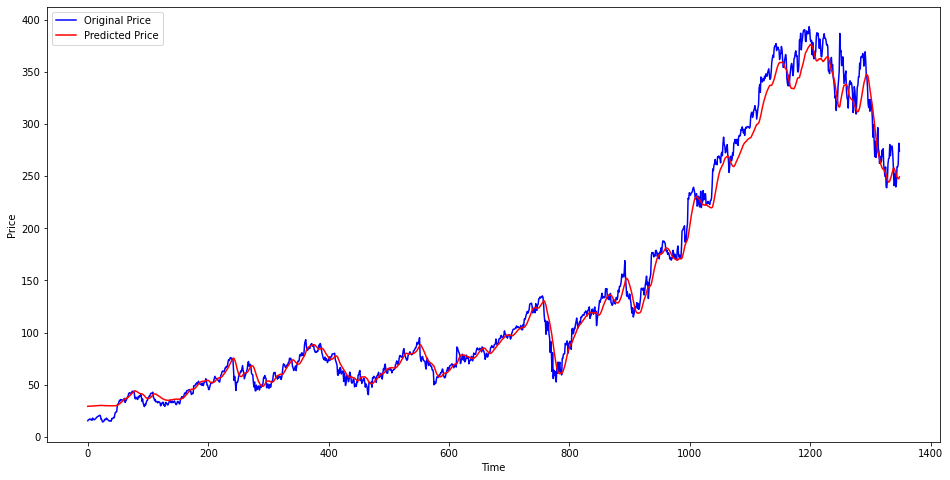

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
